Importing Libraries

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

Loading Main Dataset

In [101]:
iris = load_iris()
x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")
df = pd.concat([X, y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [102]:
df.shape

(150, 5)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [104]:
df.duplicated().sum()

np.int64(1)

In [105]:
df.drop_duplicates(inplace=True)

In [106]:
df.duplicated().sum()

np.int64(0)

In [107]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   species            149 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 7.0 KB


In [109]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Exploratory Data Analysis

Numerical Variable Distribution 

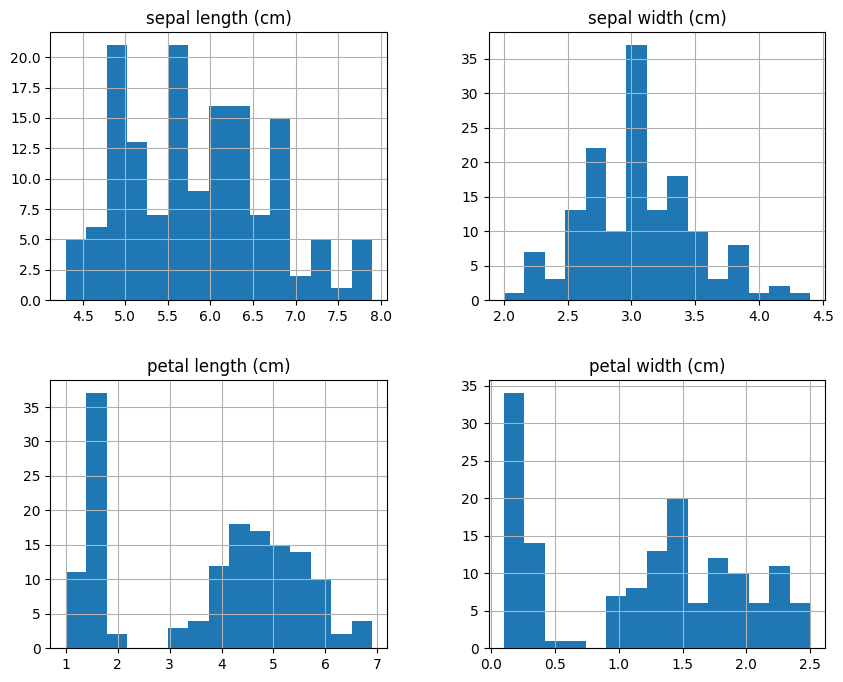

In [110]:
df_num = df._get_numeric_data().drop('species', axis=1)
df_num.hist(bins=15, figsize=(10,8))
plt.show()

Target Variable Distribution

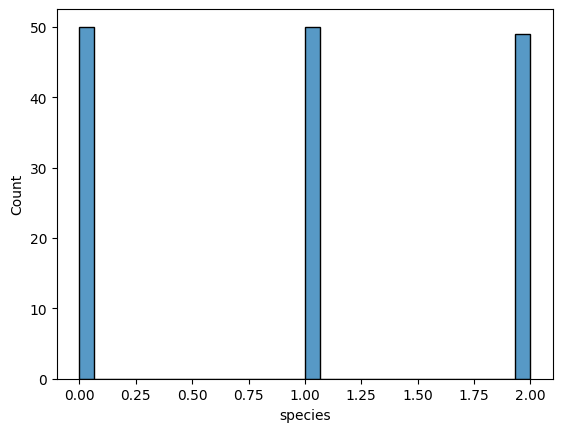

In [111]:
sns.histplot(df['species'], bins=30)
plt.show()

Feature Pair Visualization

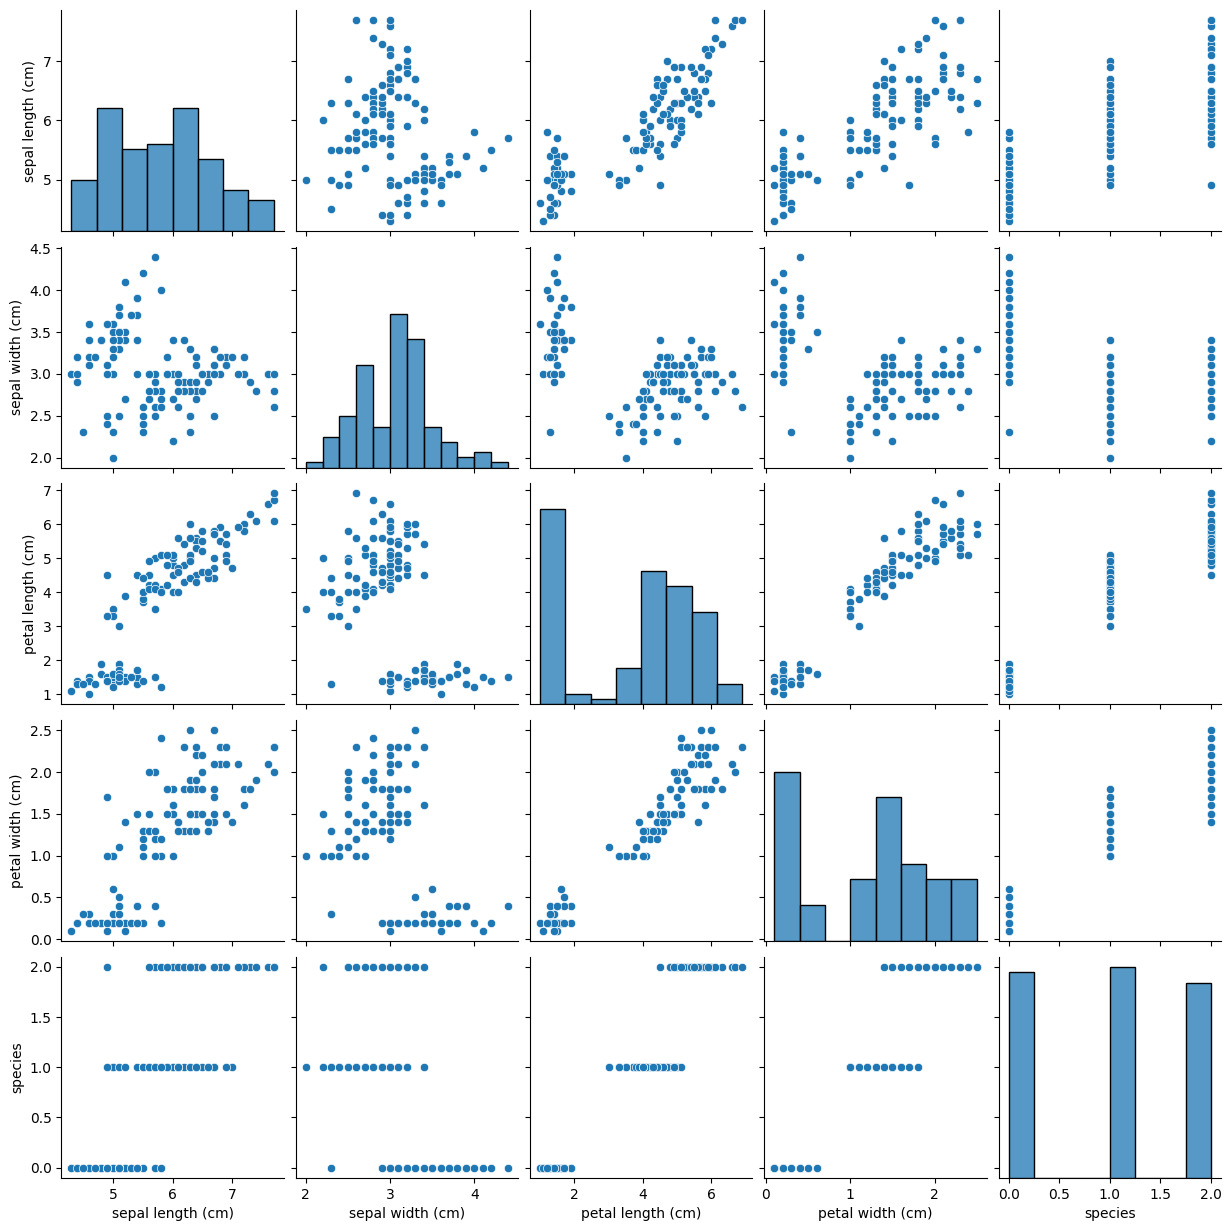

In [112]:
columns_to_plot = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species']

sns.pairplot(train[columns_to_plot])
plt.show()

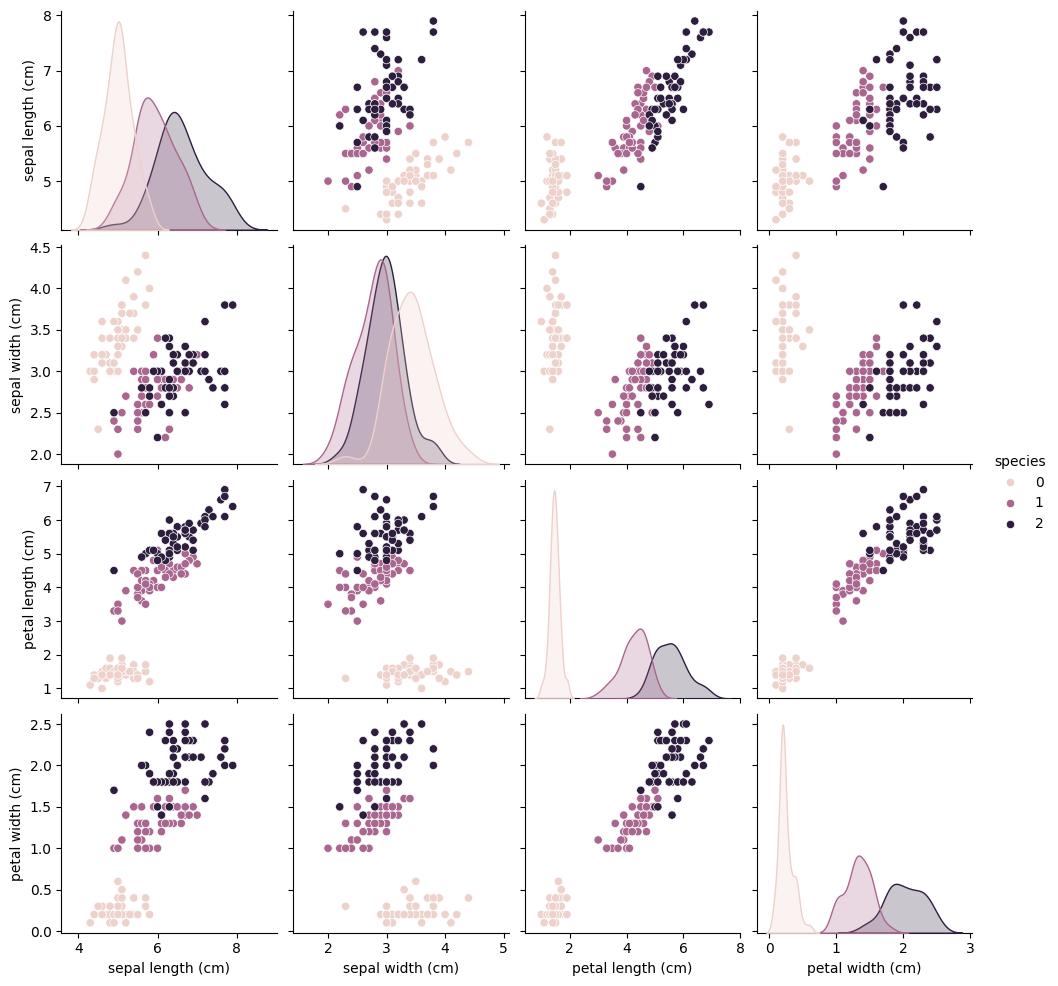

In [113]:
sns.pairplot(data=df, hue='species')
plt.show()

Feature Correlation

In [114]:
df_num = df._get_numeric_data()
df_corr = df.corr()['species'].drop('species')
df_corr

sepal length (cm)    0.786971
sepal width (cm)    -0.422987
petal length (cm)    0.949402
petal width (cm)     0.956514
Name: species, dtype: float64

In [115]:
df_num.corr()['species'].drop('species').abs().sort_values(ascending=False)

petal width (cm)     0.956514
petal length (cm)    0.949402
sepal length (cm)    0.786971
sepal width (cm)     0.422987
Name: species, dtype: float64

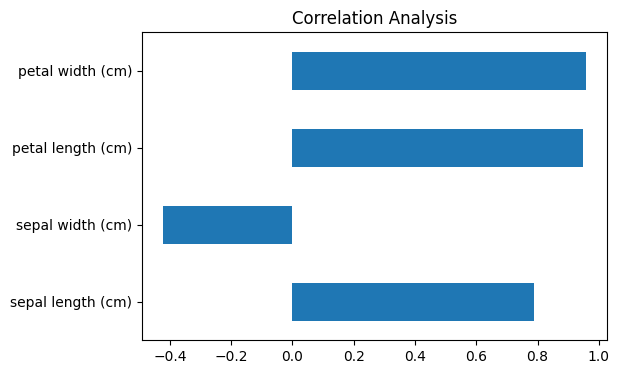

In [116]:
plt.figure(figsize=(6,4))
df_corr.plot(kind='barh')
plt.title('Correlation Analysis')
plt.show()

In [117]:
df_corr = df_num.columns
df_corr

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [118]:
df_corr = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]

df_corr = df_corr.corr()

Feature Correlation Heatmap

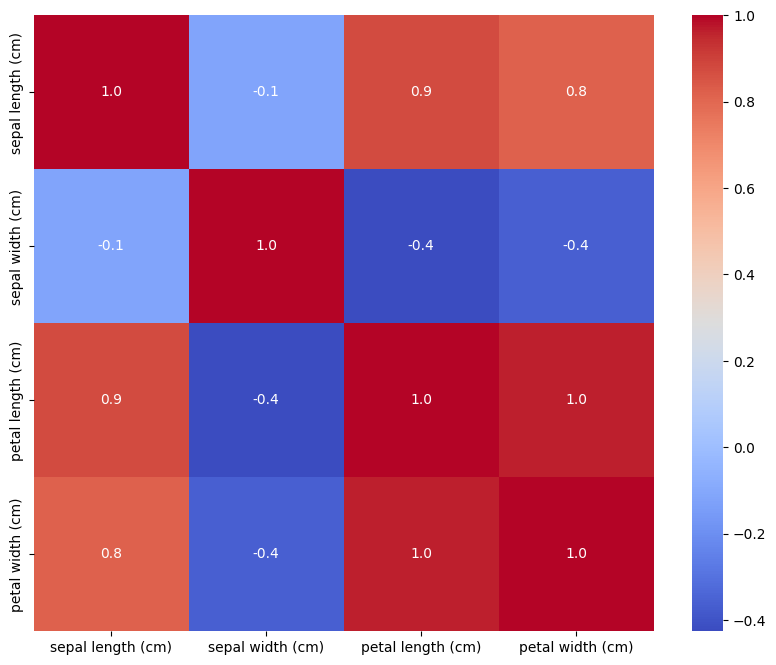

In [119]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df_corr, annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

Data Splitting

In [120]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [121]:
train.shape

(119, 5)

In [122]:
test.shape

(30, 5)

In [123]:
train.to_csv('flower classification train set.csv', index=False)
test.to_csv('flower classification test set.csv', index=False)